## Final Project Submission

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self Paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman 
* Blog post URL: https://dicchyanttamu.wixsite.com/data/post/why-you-need-to-learn-data-science-today


### The Project

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office.

In [1]:
# Import libraries for data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load all required files into dataframes

imdb_names = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.name.basics.csv.gz")
imdb_title_akas = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.akas.csv.gz")
imdb_title_basics = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.basics.csv.gz")
imdb_title_crew = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.crew.csv.gz")
imdb_title_principals = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.principals.csv.gz")
imdb_title_ratings = pd.read_csv(r"D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.ratings.csv.gz")

In [3]:
# Preview the data to check the contents

imdb_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
# Title_id seems to be tconst. Rename the column to match all data sets.

imdb_title_akas.rename(columns={'title_id':'tconst'}, inplace=True)

In [6]:
imdb_title_akas.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
imdb_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Looking at the data, we can see that applicable information for this analysis are present in 'ratings', 'start_year' and 'genres' columns.
For this EDA, we will use 'genres' with 'ratings' to get a sense of what kind of movies are trending.
Then we shall use the 'start_year' column to analyze the trend over a period of time.

These columns are present in 'title_akas', 'title_basics' and 'title_rating' dataframes.
We will merge these dataframes into one.

In [11]:
# tconst seems to be the unique identifier for each movie so we will use it as the key to merge the data frames.

imdb_1 = pd.merge(imdb_title_akas, imdb_title_basics, on='tconst')

In [12]:
imdb_1

,tconst,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance"
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance"
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0,The Attention,La atención,2019,61.0,Documentary
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0,The Attention,La atención,2019,61.0,Documentary


In [13]:
imdb_2 = pd.merge(imdb_1, imdb_title_ratings, on='tconst')

In [14]:
imdb_2.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338


Now, we will look for missing values.

In [15]:
imdb_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             260621 non-null  object 
 13  averagerating      261806 non-null  float64
 14  numvotes           261806 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 32

There seems to be duplicate values for each movie depending on region. Region is not one of our chosen variables so we can delete secondary or tertiary regions for each movie.

In [16]:
df1 = imdb_2.drop_duplicates(subset=['tconst'])

In [17]:
df1.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
48,tt0381957,1,Cloud Cuckoo Land,GB,NaN,NaN,NaN,0.0,Cloud Cuckoo Land,Cloud Cuckoo Land,2012,92.0,Drama,7.6,23
49,tt0401729,10,Джон Картер: Мiж двох свiтiв,UA,NaN,NaN,NaN,0.0,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,NaN,NaN,original,NaN,1.0,Versailles Rediscovered - The Sun King's Vanis...,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5
86,tt10084780,1,Vinara sodara veera kumara,IN,NaN,NaN,NaN,0.0,Vinara sodara veera kumara,Vinara sodara veera kumara,2019,NaN,"Drama,Romance",8.3,30


In [18]:
# Continue looking for missing values in each column

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69577 entries, 0 to 261803
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             69577 non-null  object 
 1   ordering           69577 non-null  int64  
 2   title              69577 non-null  object 
 3   region             58133 non-null  object 
 4   language           5706 non-null   object 
 5   types              24182 non-null  object 
 6   attributes         2015 non-null   object 
 7   is_original_title  69577 non-null  float64
 8   primary_title      69577 non-null  object 
 9   original_title     69577 non-null  object 
 10  start_year         69577 non-null  int64  
 11  runtime_minutes    62830 non-null  float64
 12  genres             68937 non-null  object 
 13  averagerating      69577 non-null  float64
 14  numvotes           69577 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 8.5+ MB


Language, types and attributes seems to have the least amount of data or the most missing values. We will drop these column. We are also not interested in 'ordering','title','region','is_orginal_title','original_title'. We will drop these as well.

In [19]:
df2 = df1.drop(columns=['ordering','title', 'region', 'is_original_title','original_title', 'language', 'types', 'attributes'])

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69577 entries, 0 to 261803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           69577 non-null  object 
 1   primary_title    69577 non-null  object 
 2   start_year       69577 non-null  int64  
 3   runtime_minutes  62830 non-null  float64
 4   genres           68937 non-null  object 
 5   averagerating    69577 non-null  float64
 6   numvotes         69577 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.2+ MB


There is still a slight mismatch in data available. Since the missing values in 'runtime_minutes', and 'genres' are very small, dropping those rows will not affect our overall analysis.

In [21]:
df3 = df2.dropna(subset=['runtime_minutes','genres'])

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62391 entries, 0 to 261803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           62391 non-null  object 
 1   primary_title    62391 non-null  object 
 2   start_year       62391 non-null  int64  
 3   runtime_minutes  62391 non-null  float64
 4   genres           62391 non-null  object 
 5   averagerating    62391 non-null  float64
 6   numvotes         62391 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.8+ MB


In [23]:
df3.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
48,tt0381957,Cloud Cuckoo Land,2012,92.0,Drama,7.6,23
49,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5
87,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813


### EDA I - Genre's Analysis

Now, we will look into different genres of each movie. Some movies are tagged into more than one genres. 
For this analysis, we will assume that each genre is a separate instance and that the overall ratings received will be the same across each of the genres for the same movie.

Here, ee are moving past what the movie actually is and only comparing genre vs ratings received.

In [24]:
# Split the genres into three new columns from the 'genres' column.
# We will use lambda function to loop within the column and split the data into various columns

df3[['genre_1','genre_2','genre_3']] = df3.genres.apply(lambda x: pd.Series(str(x).split(',')))

C:\Users\dicch\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
df3

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Action,Adventure,Sci-Fi
48,tt0381957,Cloud Cuckoo Land,2012,92.0,Drama,7.6,23,Drama,NaN,NaN
49,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,Action,Adventure,Sci-Fi
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5,Documentary,NaN,NaN
87,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...
261792,tt9644084,Der Atem,2019,95.0,Documentary,5.2,5,Documentary,NaN,NaN
261795,tt9657946,Homing,2019,90.0,Drama,6.0,16,Drama,NaN,NaN
261798,tt9723084,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,Adventure,Documentary,NaN
261800,tt9726638,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,Action,Adventure,Comedy


Since we will be moving the data around a bit, we will need a fixed 'key' or index to reference data from each column.

In [26]:
# Set 'tconst' as index

df4 = df3.set_index('tconst')

In [27]:
df4

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
tconst,,,,,,,,,
tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Action,Adventure,Sci-Fi
tt0381957,Cloud Cuckoo Land,2012,92.0,Drama,7.6,23,Drama,NaN,NaN
tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,Action,Adventure,Sci-Fi
tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5,Documentary,NaN,NaN
tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...
tt9644084,Der Atem,2019,95.0,Documentary,5.2,5,Documentary,NaN,NaN
tt9657946,Homing,2019,90.0,Drama,6.0,16,Drama,NaN,NaN
tt9723084,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,Adventure,Documentary,NaN


The genres are split across three columns. However, each of the genre needs to be represented as a row of itself.
This will duplicate all the other information about the movie into each one of these genres and assign values that can be used for this analysis,

In [28]:
# Create a separate dataframe to merge these columns into one

df5 = df4.loc[:,'genre_1':'genre_3']
df5

,genre_1,genre_2,genre_3
tconst,,,
tt0369610,Action,Adventure,Sci-Fi
tt0381957,Drama,NaN,NaN
tt0401729,Action,Adventure,Sci-Fi
tt10010134,Documentary,NaN,NaN
tt1014759,Adventure,Family,Fantasy
...,...,...,...
tt9644084,Documentary,NaN,NaN
tt9657946,Drama,NaN,NaN
tt9723084,Adventure,Documentary,NaN


In [29]:
# Split the dataframe acorss three different series

s1 = df5['genre_1']
s2 = df5['genre_2']
s3 = df5['genre_3']

In [30]:
# Combine these series into one 

s4 = s1.append(s2)
s5 = s4.append(s3)

s5

tconst
tt0369610          Action
tt0381957           Drama
tt0401729          Action
tt10010134    Documentary
tt1014759       Adventure
                 ...     
tt9644084             NaN
tt9657946             NaN
tt9723084             NaN
tt9726638          Comedy
tt9827784             NaN
Length: 187173, dtype: object

In [31]:
# Convert the series back to a dataframe

df6 = pd.DataFrame(s5, columns=['All_genres'] )

In [32]:
df6.sort_values(by='tconst')

,All_genres
tconst,
tt0063540,Crime
tt0063540,Action
tt0063540,Drama
tt0066787,NaN
tt0066787,Biography
...,...
tt9905462,NaN
tt9905462,Drama
tt9911774,NaN


Here you can see that three different rows have been created for the same tcont of 'tt0063540.' Now we can use this as the primary dataframe and merge back all other columns from the previous dataframe.

In [33]:
df_final = df6.merge(df4, left_index=True, right_index=True)

In [34]:
# Preview if all columns was merged

df_final.columns

Index(['All_genres', 'primary_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

In [35]:
df_final

,All_genres,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
tconst,,,,,,,,,,
tt0063540,Action,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0063540,Crime,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0063540,Drama,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0066787,Biography,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN
tt0066787,Drama,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...
tt9905462,NaN,Pengalila,2019,111.0,Drama,8.4,600,Drama,NaN,NaN
tt9905462,NaN,Pengalila,2019,111.0,Drama,8.4,600,Drama,NaN,NaN
tt9911774,Drama,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,Drama,NaN,NaN


Again, we have some NaN's in All_genres column. These are missing values for movies which did not have secondary or tertiary genres. We can drop these rows.

In [36]:
df_x = df_final.dropna(subset=['All_genres'])
df_x

,All_genres,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
tconst,,,,,,,,,,
tt0063540,Action,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0063540,Crime,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0063540,Drama,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
tt0066787,Biography,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN
tt0066787,Drama,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...
tt9899880,Comedy,Columbus,2018,85.0,Comedy,5.8,5,Comedy,NaN,NaN
tt9903952,Comedy,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,Comedy,Horror,NaN
tt9903952,Horror,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5,Comedy,Horror,NaN


Our dataset is finally ready to be used for calculation.

In [37]:
# Use groupby function to group the data by genres and view the insights 

df_w = df_x.groupby(['All_genres']).mean()

In [38]:
df_w

,start_year,runtime_minutes,averagerating,numvotes
All_genres,,,,
Action,2014.150403,103.857495,5.773309,16634.800230
Adult,2013.500000,95.500000,3.950000,68.000000
Adventure,2014.184724,93.751909,6.174767,23822.328430
Animation,2014.176355,85.774004,6.262051,10021.704115
Biography,2013.867810,90.765763,7.166372,5973.079093
Comedy,2014.060524,96.941908,6.006019,5004.257025
Crime,2014.140028,99.536304,6.112023,9336.774635
Documentary,2013.873267,86.062395,7.308313,302.283983
Drama,2014.073408,98.218067,6.376914,4362.582694


We will now plot the 'Average Ratings' received across each genre

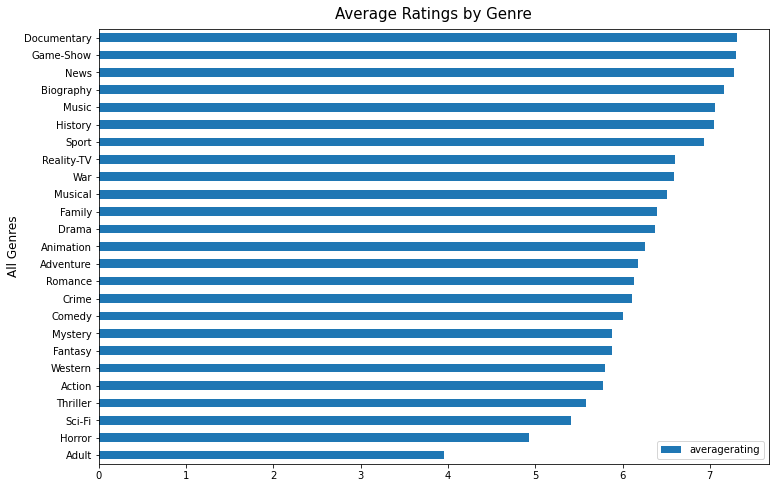

In [39]:
fig = df_w.sort_values(by=['averagerating']).plot(kind='barh', y='averagerating', figsize=(12,8), fontsize=10);
fig.legend(loc=4);
fig.set_title('Average Ratings by Genre', fontsize=15, pad=10);
fig.set_ylabel('All Genres', fontsize=12);
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\Average_Rating.png')

It seems that on average, 'Documentary' is the highest rated of all times followed by 'Game-Show.' 'Horror' and 'Adult' seems to be the least ranked categories.

However, it is also important to note that not all genres have received ratings with the same number of votes.

We will need to calculate the weighted average ratings to come up with a fair comparision.

In [40]:
df_weight = df_w.iloc[:,:-1]

In [41]:
df_weight

,start_year,runtime_minutes,averagerating
All_genres,,,
Action,2014.150403,103.857495,5.773309
Adult,2013.500000,95.500000,3.950000
Adventure,2014.184724,93.751909,6.174767
Animation,2014.176355,85.774004,6.262051
Biography,2013.867810,90.765763,7.166372
Comedy,2014.060524,96.941908,6.006019
Crime,2014.140028,99.536304,6.112023
Documentary,2013.873267,86.062395,7.308313
Drama,2014.073408,98.218067,6.376914


In [42]:
df_total = df_x.groupby(['All_genres']).sum()

In [43]:
df_total

,start_year,runtime_minutes,averagerating,numvotes
All_genres,,,,
Action,12239992,631142.0,35084.4,101089681
Adult,4027,191.0,7.9,136
Adventure,7120143,331413.0,21827.8,84211931
Animation,3083704,131320.0,9587.2,15343229
Biography,7282146,328209.0,25913.6,21598654
Comedy,29816152,1435128.0,88913.1,74083021
Crime,8543982,422233.0,25927.2,39606598
Documentary,31082120,1328287.0,112796.5,4665451
Drama,55092964,2686657.0,174434.1,119334087


In [44]:
df_weight['numvotes'] = df_total['numvotes'] 

In [45]:
df_weight

,start_year,runtime_minutes,averagerating,numvotes
All_genres,,,,
Action,2014.150403,103.857495,5.773309,101089681
Adult,2013.500000,95.500000,3.950000,136
Adventure,2014.184724,93.751909,6.174767,84211931
Animation,2014.176355,85.774004,6.262051,15343229
Biography,2013.867810,90.765763,7.166372,21598654
Comedy,2014.060524,96.941908,6.006019,74083021
Crime,2014.140028,99.536304,6.112023,39606598
Documentary,2013.873267,86.062395,7.308313,4665451
Drama,2014.073408,98.218067,6.376914,119334087


In [46]:
# Calculate the weights of number of votes

df_weight['weights'] = df_weight.numvotes/df_weight.numvotes.sum()

In [47]:
df_weight

,start_year,runtime_minutes,averagerating,numvotes,weights
All_genres,,,,,
Action,2014.150403,103.857495,5.773309,101089681,1.475982e-01
Adult,2013.500000,95.500000,3.950000,136,1.985697e-07
Adventure,2014.184724,93.751909,6.174767,84211931,1.229554e-01
Animation,2014.176355,85.774004,6.262051,15343229,2.240221e-02
Biography,2013.867810,90.765763,7.166372,21598654,3.153558e-02
Comedy,2014.060524,96.941908,6.006019,74083021,1.081665e-01
Crime,2014.140028,99.536304,6.112023,39606598,5.782846e-02
Documentary,2013.873267,86.062395,7.308313,4665451,6.811892e-03
Drama,2014.073408,98.218067,6.376914,119334087,1.742363e-01


In [48]:
# Calculate the weighted average rating for each genre

df_weight['Weighted_Average_Rating'] = df_weight.averagerating*df_weight.weights

In [49]:
df_weight

,start_year,runtime_minutes,averagerating,numvotes,weights,Weighted_Average_Rating
All_genres,,,,,,
Action,2014.150403,103.857495,5.773309,101089681,1.475982e-01,8.521298e-01
Adult,2013.500000,95.500000,3.950000,136,1.985697e-07,7.843504e-07
Adventure,2014.184724,93.751909,6.174767,84211931,1.229554e-01,7.592211e-01
Animation,2014.176355,85.774004,6.262051,15343229,2.240221e-02,1.402838e-01
Biography,2013.867810,90.765763,7.166372,21598654,3.153558e-02,2.259957e-01
Comedy,2014.060524,96.941908,6.006019,74083021,1.081665e-01,6.496500e-01
Crime,2014.140028,99.536304,6.112023,39606598,5.782846e-02,3.534489e-01
Documentary,2013.873267,86.062395,7.308313,4665451,6.811892e-03,4.978344e-02
Drama,2014.073408,98.218067,6.376914,119334087,1.742363e-01,1.111090e+00


We can now plot this result to compare what genres have been doing well and what genres to stay away from.

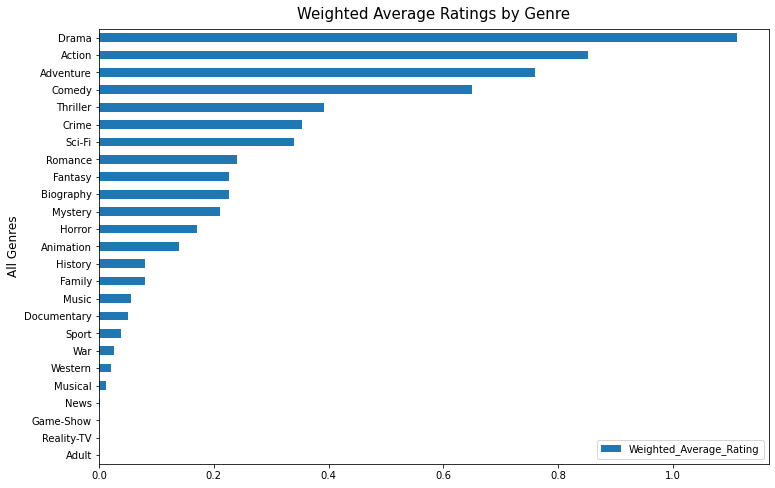

In [50]:
# Plot a horizontal histogram and adjust the chart accodingly

fig = df_weight.sort_values(by=['Weighted_Average_Rating']).plot(kind='barh', y='Weighted_Average_Rating', figsize=(12,8), fontsize=10);
fig.legend(loc=4);
fig.set_title('Weighted Average Ratings by Genre', fontsize=15, pad=10);
fig.set_ylabel('All Genres', fontsize=12);
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\Weighted_Average_Rating.png')

It is clear in the above graph that 'Drama' is the winner followed by 'Action', 'Adventure' and 'Comedy'.

### EDA II - GENRE OUTREACH

With the data spanning across 10 years, it is safe to assume that the number of votes received can be equivalant to people being interested in watching the movie and participating in the ratings count. 

In [51]:
df_a = df_x.groupby(['All_genres']).sum()

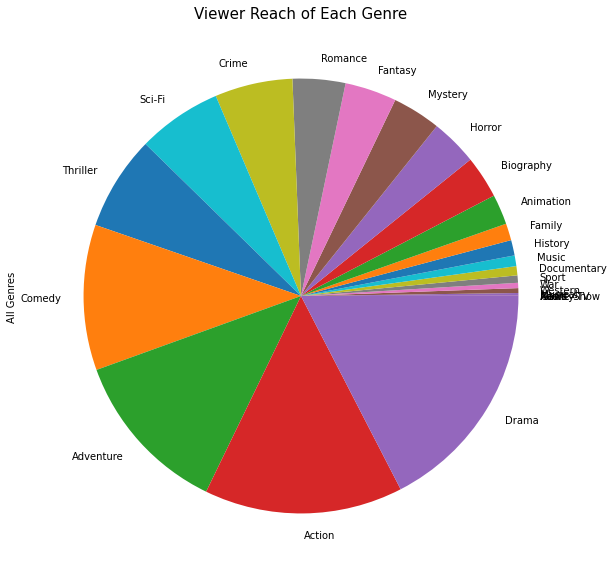

In [52]:
# Plot the graph using number of votes received

fig = df_a.sort_values(by=['numvotes']).plot(kind='pie', y='numvotes', figsize=(12,10), fontsize=10, legend=False);
fig.set_title('Viewer Reach of Each Genre', fontsize=15);
fig.set_ylabel('All Genres', labelpad=12);
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\pie_chart.png')

Here, we can tell that 'Drama' has the most reach out of all, which means that it captures the most audience. 'Action', 'Adventure', and 'Comedy' follows subsequently.

PART III - Time-series Analysis 

In this part, we will analyze the start_year and see if we can identify any kind of trends 

In [53]:
# Create a new dataframe with year and genres

df_y = df_x[['start_year','All_genres']]

In [54]:
df_y

,start_year,All_genres
tconst,,
tt0063540,2013,Action
tt0063540,2013,Crime
tt0063540,2013,Drama
tt0066787,2019,Biography
tt0066787,2019,Drama
...,...,...
tt9899880,2018,Comedy
tt9903952,2018,Comedy
tt9903952,2018,Horror


Here, we will analyze the number of movies produced each year for each genre. 

In [55]:
# Set index as year and sort by year

dfz = df_y.set_index('start_year', drop=True).sort_values(by='start_year')
dfz

,All_genres
start_year,
2010,Documentary
2010,Comedy
2010,Romance
2010,Biography
2010,Documentary
...,...
2019,Drama
2019,Drama
2019,Thriller


In [56]:
# Use .loc to access genres for each year, count the number of genres and put it in a dataframe

y_2010 = pd.DataFrame(dfz.loc[2010]['All_genres'].value_counts()).rename(columns={'All_genres':'2010'})
y_2011 = pd.DataFrame(dfz.loc[2011]['All_genres'].value_counts()).rename(columns={'All_genres':'2011'})
y_2012 = pd.DataFrame(dfz.loc[2012]['All_genres'].value_counts()).rename(columns={'All_genres':'2012'})
y_2013 = pd.DataFrame(dfz.loc[2013]['All_genres'].value_counts()).rename(columns={'All_genres':'2013'})
y_2014 = pd.DataFrame(dfz.loc[2014]['All_genres'].value_counts()).rename(columns={'All_genres':'2014'})
y_2015 = pd.DataFrame(dfz.loc[2015]['All_genres'].value_counts()).rename(columns={'All_genres':'2015'})
y_2016 = pd.DataFrame(dfz.loc[2016]['All_genres'].value_counts()).rename(columns={'All_genres':'2016'})
y_2017 = pd.DataFrame(dfz.loc[2017]['All_genres'].value_counts()).rename(columns={'All_genres':'2017'})
y_2018 = pd.DataFrame(dfz.loc[2018]['All_genres'].value_counts()).rename(columns={'All_genres':'2018'})
y_2019 = pd.DataFrame(dfz.loc[2019]['All_genres'].value_counts()).rename(columns={'All_genres':'2019'})

In [57]:
# Preview the dataframe

y_2012

,2012
Drama,2924
Documentary,1808
Comedy,1650
Horror,756
Thriller,730
Action,612
Romance,591
Crime,452
Biography,383
Adventure,350


In [58]:
# Creata a list of all new dataframes

years = [y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018, y_2019]

In [59]:
# Combine all dataframes across the column

final = pd.concat(years, axis=1)
final

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Drama,2641.0,2849.0,2924.0,3285.0,3301.0,3364.0,3263.0,3052.0,2169.0,506.0
Documentary,1540.0,1718.0,1808.0,1874.0,1967.0,1961.0,1922.0,1680.0,817.0,147.0
Comedy,1440.0,1569.0,1650.0,1722.0,1791.0,1747.0,1790.0,1633.0,1151.0,311.0
Thriller,628.0,663.0,730.0,882.0,913.0,948.0,933.0,846.0,636.0,156.0
Action,627.0,612.0,612.0,653.0,694.0,736.0,780.0,727.0,522.0,114.0
Horror,582.0,642.0,756.0,748.0,792.0,807.0,834.0,798.0,523.0,96.0
Romance,579.0,575.0,591.0,705.0,778.0,738.0,695.0,576.0,404.0,80.0
Crime,399.0,434.0,452.0,478.0,504.0,509.0,552.0,484.0,341.0,89.0
Biography,332.0,370.0,383.0,511.0,593.0,483.0,384.0,307.0,200.0,53.0
Adventure,303.0,356.0,350.0,448.0,430.0,438.0,438.0,399.0,295.0,78.0


Movie count in 2019 seems to be an outlier. We not include this column for our time series analysis

In [60]:
final = final.drop('2019', axis=1)

In [61]:
# Transpose the dataset 
    
finalt = final.transpose()

In [62]:
finalt

,Drama,Documentary,Comedy,Thriller,Action,Horror,Romance,Crime,Biography,Adventure,...,Music,Animation,Sport,War,Musical,News,Western,Reality-TV,Adult,Game-Show
2010,2641.0,1540.0,1440.0,628.0,627.0,582.0,579.0,399.0,332.0,303.0,...,178.0,141.0,84.0,82.0,69.0,62.0,23.0,2.0,NaN,NaN
2011,2849.0,1718.0,1569.0,663.0,612.0,642.0,575.0,434.0,370.0,356.0,...,213.0,178.0,113.0,95.0,71.0,71.0,28.0,NaN,NaN,NaN
2012,2924.0,1808.0,1650.0,730.0,612.0,756.0,591.0,452.0,383.0,350.0,...,228.0,159.0,98.0,76.0,77.0,86.0,27.0,1.0,1.0,NaN
2013,3285.0,1874.0,1722.0,882.0,653.0,748.0,705.0,478.0,511.0,448.0,...,216.0,156.0,135.0,66.0,72.0,103.0,22.0,2.0,NaN,1.0
2014,3301.0,1967.0,1791.0,913.0,694.0,792.0,778.0,504.0,593.0,430.0,...,255.0,174.0,146.0,104.0,71.0,126.0,37.0,1.0,NaN,NaN
2015,3364.0,1961.0,1747.0,948.0,736.0,807.0,738.0,509.0,483.0,438.0,...,226.0,185.0,130.0,97.0,64.0,89.0,24.0,4.0,1.0,NaN
2016,3263.0,1922.0,1790.0,933.0,780.0,834.0,695.0,552.0,384.0,438.0,...,159.0,174.0,143.0,87.0,72.0,22.0,24.0,1.0,NaN,NaN
2017,3052.0,1680.0,1633.0,846.0,727.0,798.0,576.0,484.0,307.0,399.0,...,171.0,185.0,108.0,92.0,65.0,9.0,32.0,1.0,NaN,1.0
2018,2169.0,817.0,1151.0,636.0,522.0,523.0,404.0,341.0,200.0,295.0,...,104.0,141.0,73.0,58.0,37.0,4.0,21.0,1.0,NaN,NaN


#### TIME-SERIES ANALYSIS 1 - TOP 5 MOST POPULAR GENRES

In [63]:
top_5 = finalt[['Drama', 'Action', 'Adventure', 'Comedy', 'Thriller']]
top_5

,Drama,Action,Adventure,Comedy,Thriller
2010,2641.0,627.0,303.0,1440.0,628.0
2011,2849.0,612.0,356.0,1569.0,663.0
2012,2924.0,612.0,350.0,1650.0,730.0
2013,3285.0,653.0,448.0,1722.0,882.0
2014,3301.0,694.0,430.0,1791.0,913.0
2015,3364.0,736.0,438.0,1747.0,948.0
2016,3263.0,780.0,438.0,1790.0,933.0
2017,3052.0,727.0,399.0,1633.0,846.0
2018,2169.0,522.0,295.0,1151.0,636.0


<ipython-input-64-33c5d7d1bb99>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')


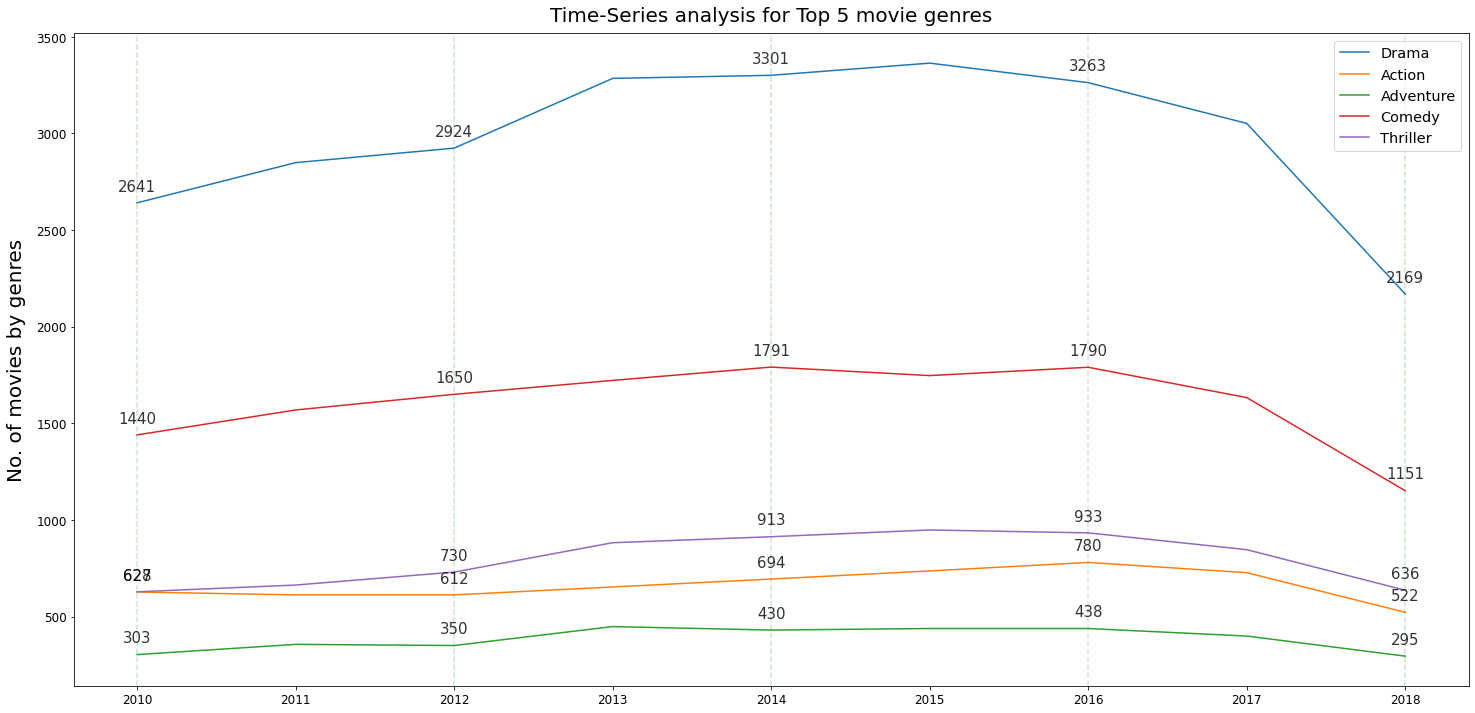

In [64]:
# Plot the data in a line graph

fig = top_5.plot(kind='line', figsize=(25,12), fontsize=12);
fig.legend(fontsize=14.5)
fig.set_ylabel('No. of movies by genres', fontsize=20, labelpad=10);
fig.set_title('Time-Series analysis for Top 5 movie genres', fontsize=20, pad=12);

# Use vlines to draw some distinct lines
vlines = [0,2,4,6,8]
for v in vlines:
    fig.axvline(v, color='green', ls='--', alpha=0.2);
    pass

# Use vlines as coorodinates to annotate data in the graph 
for movie in range(5):
    xa = vlines
    ya = []
    for i in range(0,10,2):
        ya.append(top_5.iloc[i][movie])
    for x,y in zip(xa,ya):
        fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\Top_5_Rated.png')

We can see a decreasing trend in number of movies produced year over year. Drama seems to be the most produced genre for the top 5, followed by Action and Thriller.

#### TIME-SERIES ANALYSIS 2 - All GENRES

<ipython-input-65-fb78e19657e9>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')


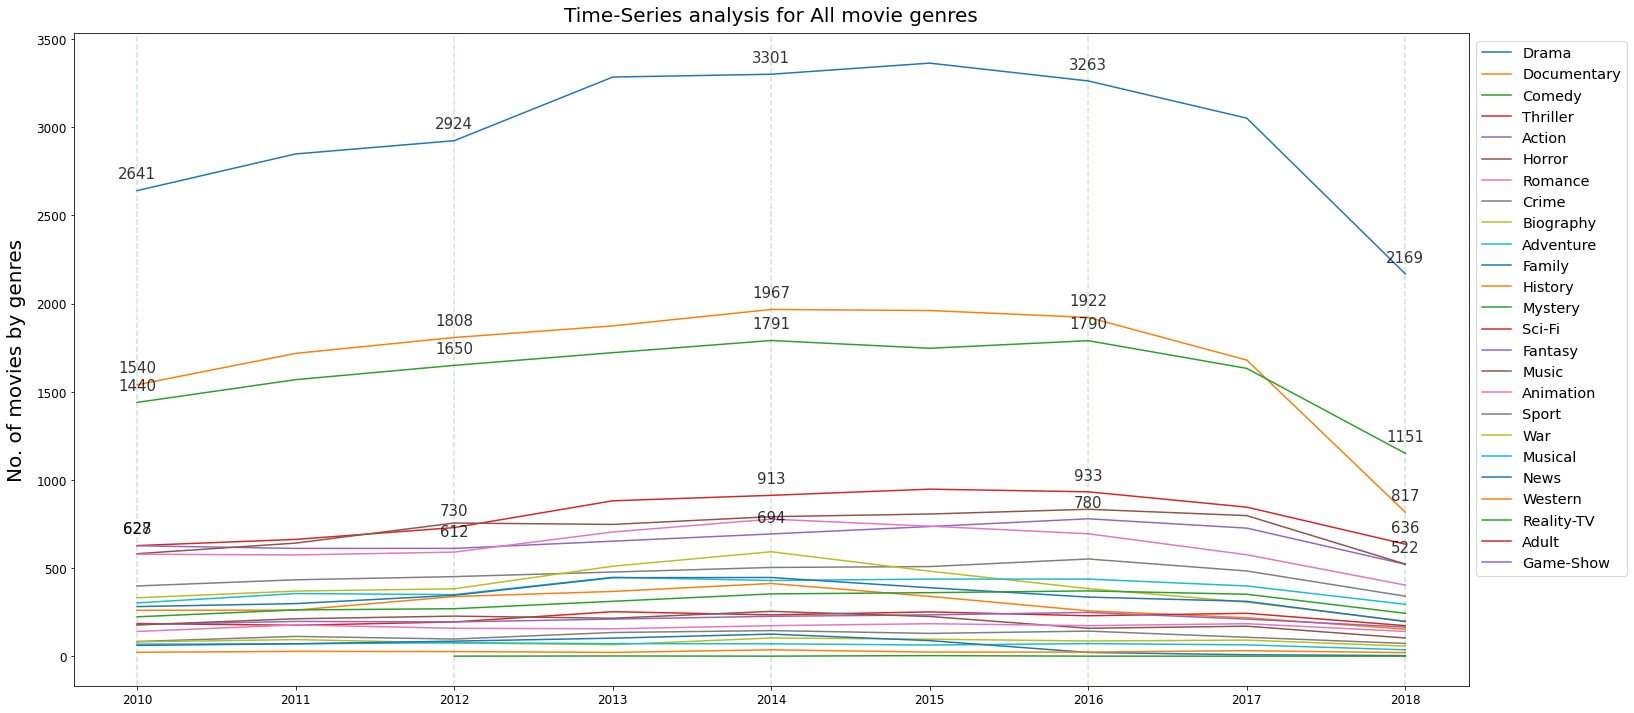

In [65]:
# Plot the graph

fig = finalt.plot(kind='line', figsize=(25,12), fontsize=12);
fig.legend(loc='best', bbox_to_anchor=(1,1), fontsize=14.5)
fig.set_ylabel('No. of movies by genres', fontsize=20, labelpad=10);
fig.set_title('Time-Series analysis for All movie genres', fontsize=20, pad=12);
vlines = [0,2,4,6,8]
for v in vlines:
    fig.axvline(v, color='green', ls='--', alpha=0.2);
    pass

for movie in range(5):
    xa = vlines
    ya = []
    for i in range(0,10,2):
        ya.append(finalt.iloc[i][movie])
    for x,y in zip(xa,ya):
        fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\All_Rated.png')

The above graph confirms that there is indeed a decreasing trend in number of movies produced year over year.

In [66]:
final.sum()

2010    10845.0
2011    11755.0
2012    12354.0
2013    13669.0
2014    14353.0
2015    14128.0
2016    13717.0
2017    12504.0
2018     8432.0
dtype: float64

TIME-SERIES ANALYSIS 3 - TOP 5 MOST PRODUCED GENRES

In [67]:
# Count the total number of each genre produced

movie_count = final.sum(axis=1)
movie_count

Drama          26848.0
Documentary    15287.0
Comedy         14493.0
Thriller        7179.0
Action          5963.0
Horror          6482.0
Romance         5641.0
Crime           4153.0
Biography       3563.0
Adventure       3457.0
Family          3054.0
History         2614.0
Mystery         2751.0
Sci-Fi          1945.0
Fantasy         1872.0
Music           1750.0
Animation       1493.0
Sport           1030.0
War              757.0
Musical          598.0
News             572.0
Western          238.0
Reality-TV        13.0
Adult              2.0
Game-Show          2.0
dtype: float64

In [68]:
# Use the above series as index to pick out the top 5 most produced movies

most_5 = finalt[movie_count.index[:5].tolist()]
most_5

,Drama,Documentary,Comedy,Thriller,Action
2010,2641.0,1540.0,1440.0,628.0,627.0
2011,2849.0,1718.0,1569.0,663.0,612.0
2012,2924.0,1808.0,1650.0,730.0,612.0
2013,3285.0,1874.0,1722.0,882.0,653.0
2014,3301.0,1967.0,1791.0,913.0,694.0
2015,3364.0,1961.0,1747.0,948.0,736.0
2016,3263.0,1922.0,1790.0,933.0,780.0
2017,3052.0,1680.0,1633.0,846.0,727.0
2018,2169.0,817.0,1151.0,636.0,522.0


<ipython-input-69-6ee04c87842d>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')


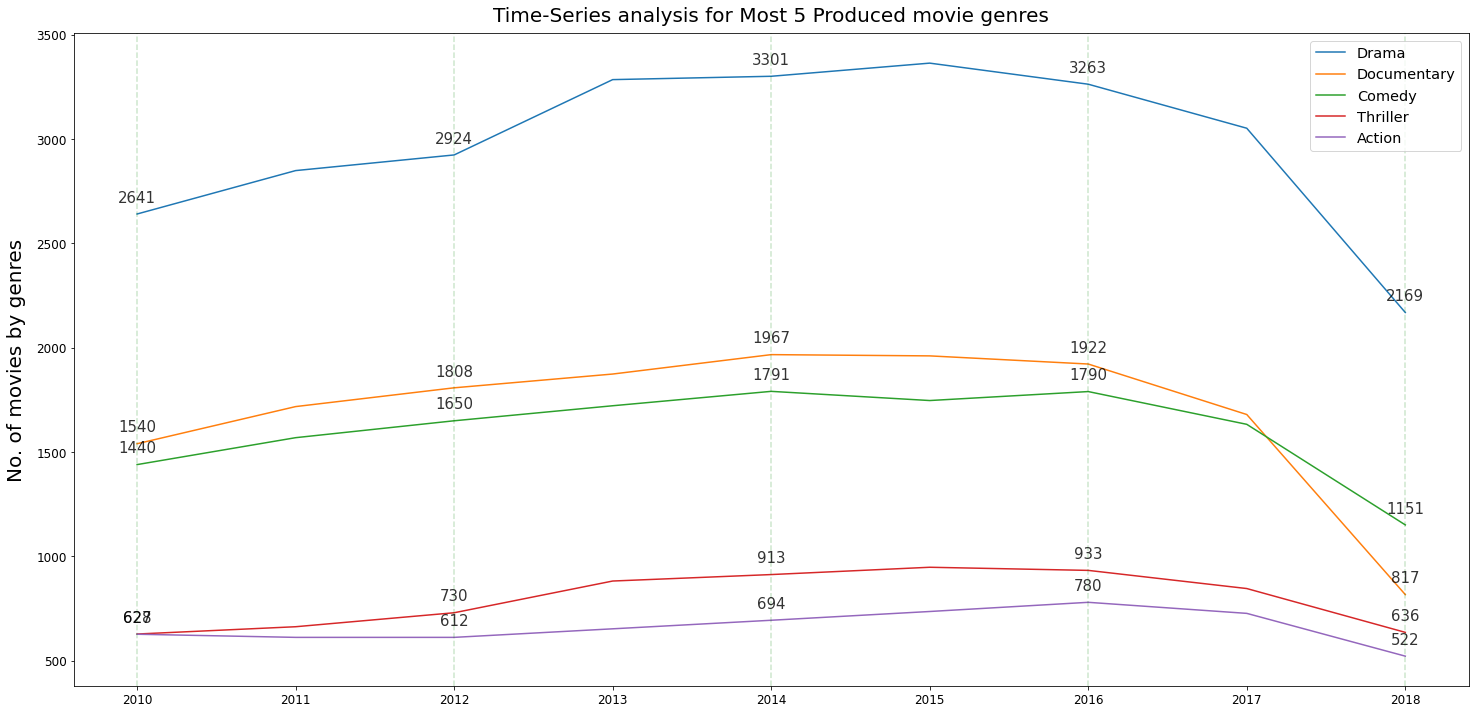

In [69]:
# Plot the graph

fig = most_5.plot(kind='line', figsize=(25,12), fontsize=12);
fig.legend(fontsize=14.5)
fig.set_ylabel('No. of movies by genres', fontsize=20, labelpad=10);
fig.set_title('Time-Series analysis for Most 5 Produced movie genres', fontsize=20, pad=12);
vlines = [0,2,4,6,8]
for v in vlines:
    fig.axvline(v, color='green', ls='--', alpha=0.2);
    pass

for movie in range(5):
    xa = vlines
    ya = []
    for i in range(0,10,2):
        ya.append(most_5.iloc[i][movie])
    for x,y in zip(xa,ya):
        fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\Most_5_Produced.png')

#### TIME-SERIES ANALYSIS 4 - LEAST 5 PRODUCED MOVIES

In [70]:
least_5 = finalt[movie_count.index[-5:].tolist()]
least_5

,News,Western,Reality-TV,Adult,Game-Show
2010,62.0,23.0,2.0,NaN,NaN
2011,71.0,28.0,NaN,NaN,NaN
2012,86.0,27.0,1.0,1.0,NaN
2013,103.0,22.0,2.0,NaN,1.0
2014,126.0,37.0,1.0,NaN,NaN
2015,89.0,24.0,4.0,1.0,NaN
2016,22.0,24.0,1.0,NaN,NaN
2017,9.0,32.0,1.0,NaN,1.0
2018,4.0,21.0,1.0,NaN,NaN


In [71]:
# There seems to be some missings values, which we will fill as 0 for no movies produced

least_5_final = least_5.fillna(value=0)
least_5_final

,News,Western,Reality-TV,Adult,Game-Show
2010,62.0,23.0,2.0,0.0,0.0
2011,71.0,28.0,0.0,0.0,0.0
2012,86.0,27.0,1.0,1.0,0.0
2013,103.0,22.0,2.0,0.0,1.0
2014,126.0,37.0,1.0,0.0,0.0
2015,89.0,24.0,4.0,1.0,0.0
2016,22.0,24.0,1.0,0.0,0.0
2017,9.0,32.0,1.0,0.0,1.0
2018,4.0,21.0,1.0,0.0,0.0


<ipython-input-72-b5256b52141c>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')


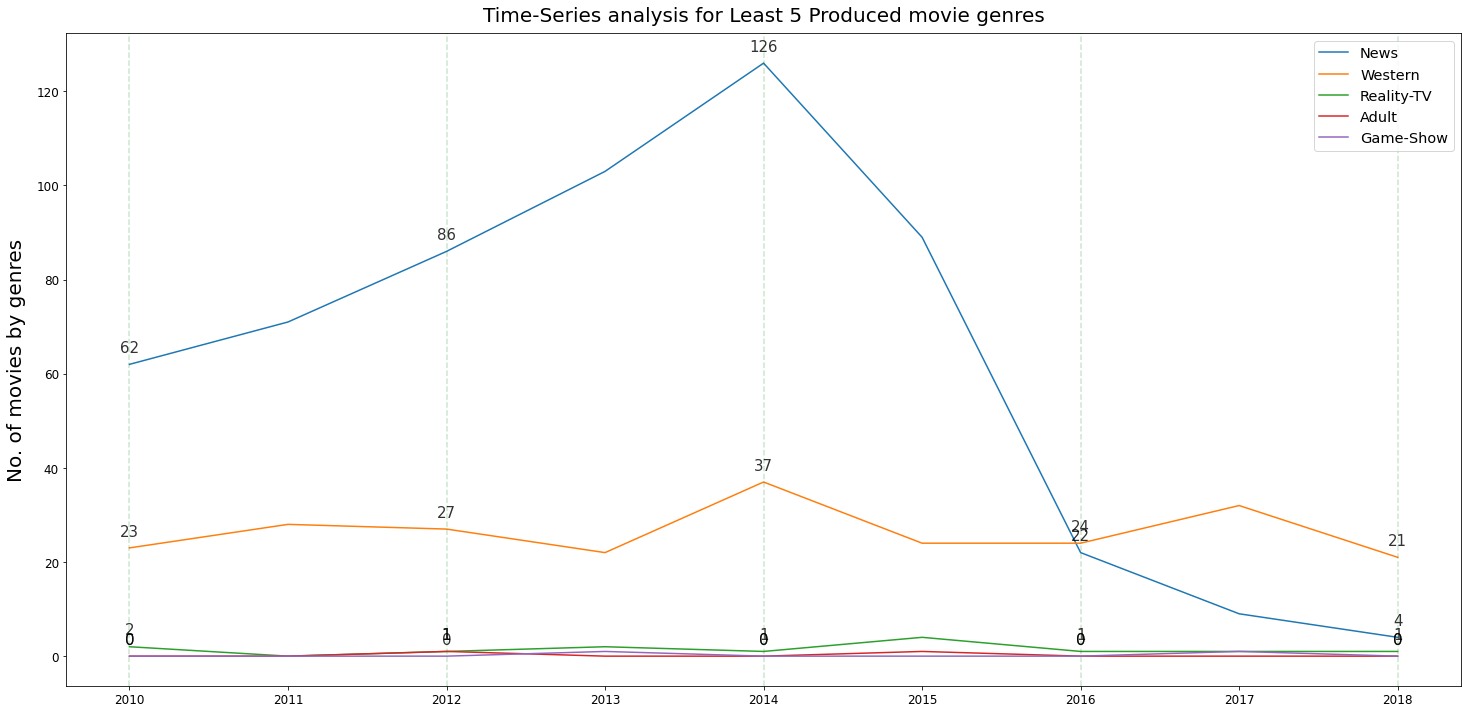

In [72]:
# Plot the graph

fig = least_5_final.plot(kind='line', figsize=(25,12), fontsize=12);
fig.legend(fontsize=14.5)
fig.set_ylabel('No. of movies by genres', fontsize=20, labelpad=10);
fig.set_title('Time-Series analysis for Least 5 Produced movie genres', fontsize=20, pad=12);
vlines = [0,2,4,6,8]
for v in vlines:
    fig.axvline(v, color='green', ls='--', alpha=0.2);
    pass

for movie in range(5):
    xa = vlines
    ya = []
    for i in range(0,10,2):
        ya.append(least_5_final.iloc[i][movie])
    for x,y in zip(xa,ya):
        fig.annotate(s=int(y), xy=(x,y), fontsize=15, alpha=.8, color='black', textcoords='offset points', xytext=(0,12), ha='center')
plt.savefig(r'D:\Data Science\Module_1_Final_Project\dsc-mod-1-project-v2-1-online-ds-sp-000\Graphs\Least_5_Produced.png')

All four time-series analysis confirm that there is a decreasing number of movies being produced each year.

### BONUS - GENRES BY GROSS REVENUE EARNED

A more deeper analysis can be done to see what genre has produced most amount of income. This can be used to further determine what genre to embark upon or even what kind of income can be expected if we were to produce a movie of a certain genre.

The web scraping took too long to pull data for all 62391 movies so I had to discontinue further analysis.

Please see below for code created to scrape Gross USA income for each movie from the IMDB website.

In [73]:
df3

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Action,Adventure,Sci-Fi
48,tt0381957,Cloud Cuckoo Land,2012,92.0,Drama,7.6,23,Drama,NaN,NaN
49,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,Action,Adventure,Sci-Fi
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5,Documentary,NaN,NaN
87,tt1014759,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...
261792,tt9644084,Der Atem,2019,95.0,Documentary,5.2,5,Documentary,NaN,NaN
261795,tt9657946,Homing,2019,90.0,Drama,6.0,16,Drama,NaN,NaN
261798,tt9723084,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,Adventure,Documentary,NaN
261800,tt9726638,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,Action,Adventure,Comedy


#### Import BeautifulSoup for web scraping 

from bs4 import BeautifulSoup
import requests
import re

#### Split the tcont into a list to be looped for each url

tconsts = df3['tconst'].tolist()[:10]
tconsts

#### Create an empty list to hold all Gross incomes

Gross_USA = []

#### Loop through each of the tconst id's

for tconst in tconsts:
    url = 'https://www.imdb.com/title/{}/'.format(tconst)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    
    # The earning details is found under id=titleDetails
    
    title = soup.find('div', id='titleDetails')
    
    # I have used regex to pick out the text that particularly specifies 'Gross USA' earning. 
    # This can be changed to scrape 'Budget','Opening weekend',or 'worldwide gross'
    regex = re.compile('Gross USA')
    
    # Here, I used try and except block to keep the code running even if a movie did not have the details requested
    try:
        earnings = title.find('h4', text=regex).nextSibling.strip()
        Gross_USA.append(earnings)
    except(AttributeError):
        Gross_USA.append(0)
Gross_USA

The scraped list seems to be a string. This will then have to be converted to an interger using split and join functions. This then can be used to perform the budget analysis.

# Conclusion

In [74]:
df_weight.sort_values('Weighted_Average_Rating', ascending=False)

,start_year,runtime_minutes,averagerating,numvotes,weights,Weighted_Average_Rating
All_genres,,,,,,
Drama,2014.073408,98.218067,6.376914,119334087,1.742363e-01,1.111090e+00
Action,2014.150403,103.857495,5.773309,101089681,1.475982e-01,8.521298e-01
Adventure,2014.184724,93.751909,6.174767,84211931,1.229554e-01,7.592211e-01
Comedy,2014.060524,96.941908,6.006019,74083021,1.081665e-01,6.496500e-01
Thriller,2014.249898,96.320245,5.583899,48093273,7.021961e-02,3.920992e-01
Crime,2014.140028,99.536304,6.112023,39606598,5.782846e-02,3.534489e-01
Sci-Fi,2014.209279,92.515381,5.405345,42951290,6.271195e-02,3.389798e-01
Romance,2013.990212,102.919245,6.132215,26847383,3.919910e-02,2.403773e-01
Fantasy,2014.159686,96.153403,5.880890,26320480,3.842978e-02,2.260013e-01


In [75]:
top_3 = df_w.loc[['Drama', 'Action', 'Adventure'], :].transpose()

In [76]:
top_3

All_genres,Drama,Action,Adventure
start_year,2014.073408,2014.150403,2014.184724
runtime_minutes,98.218067,103.857495,93.751909
averagerating,6.376914,5.773309,6.174767
numvotes,4362.582694,16634.800230,23822.328430


In [77]:
top_3_rating = (top_3.Drama + top_3.Action + top_3.Adventure)

In [78]:
top_3_rating

start_year          6042.408535
runtime_minutes      295.827472
averagerating         18.324990
numvotes           44819.711354
dtype: float64

In [79]:
df_c = df_a.copy()

In [80]:
df_c['Percentage'] = (df_c.numvotes/df_c.numvotes.sum())*100

In [81]:
df_c

,start_year,runtime_minutes,averagerating,numvotes,Percentage
All_genres,,,,,
Action,12239992,631142.0,35084.4,101089681,14.759816
Adult,4027,191.0,7.9,136,0.000020
Adventure,7120143,331413.0,21827.8,84211931,12.295544
Animation,3083704,131320.0,9587.2,15343229,2.240221
Biography,7282146,328209.0,25913.6,21598654,3.153558
Comedy,29816152,1435128.0,88913.1,74083021,10.816650
Crime,8543982,422233.0,25927.2,39606598,5.782846
Documentary,31082120,1328287.0,112796.5,4665451,0.681189
Drama,55092964,2686657.0,174434.1,119334087,17.423629


In [82]:
reach = df_c.loc[['Drama', 'Action', 'Adventure'], :].sum()

In [83]:
reach['Percentage']

44.47898842068881